# Faster R-CNN Inferencing using OpenCV DNN

In [1]:
import os
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

cv2.__version__

'4.4.0'

In [2]:
from utils import Utils

utils = Utils()

In [3]:
# load label class coco dataset

classesFile = "coco.json"
with open(classesFile) as json_labels:
    classes = json.load(json_labels)
 
print("number of class :", len(classes))

number of class : 80


In [5]:
# load petrained model (.pb & .pbtxt) faster R-CNN with backbone Resnet 50 on COCO dataset

net = cv2.dnn.readNetFromTensorflow("model/faster_rcnn_frozen_inference_graph.pb", 
                                    "model/faster_rcnn_resnet50_coco_2018_01_28.pbtxt")

In [6]:
# set CUDA as backend & target OpenCV DNN

net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)

In [7]:
# get output layers
layerOutput = net.getUnconnectedOutLayersNames()
print(layerOutput)

['detection_out_final']


In [27]:
# load image & convert to blob
target_w = 244
target_h = 244

img = cv2.imread("test_img/cow.jpg")
img = cv2.resize(img, (850,850))

blob = cv2.dnn.blobFromImage(img, 1.0, (target_w, target_h), (0, 0, 0), swapRB=True, crop=False)

In [28]:
# predict classess & box

net.setInput(blob)
output = net.forward(layerOutput)

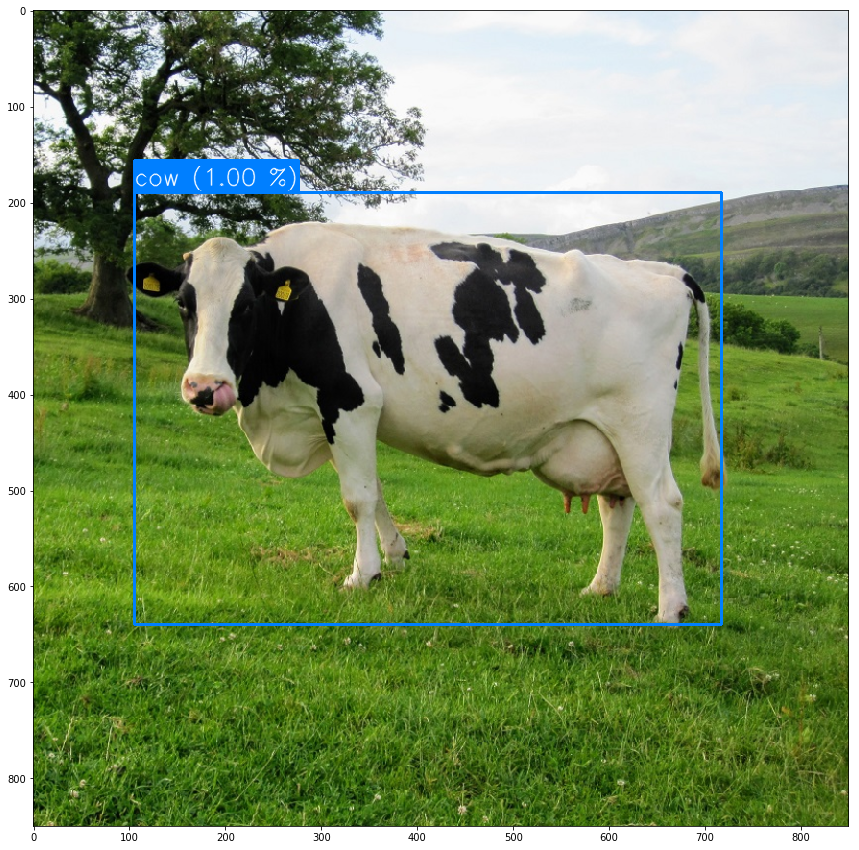

In [29]:
# postprocessing (NMS & draw box)
img = utils.postprocess(output, img, classes, font_size=0.8)

# show image
plt.figure(figsize=(15,15))
plt.imshow(img[:,:,::-1])

# Inferencing using Video Stream

- Run script `faster_r-cnn_flask.py` in terminal,
```
python3 faster_r-cnn_flask.py
```